# Deep Learning

When people refer to deep learning, they are often referring to a class of machine learning algorithms known as neural networks, which was inspired by the structure and function of the brain.  Whereas the performance of older machine learning algorithms saturates as more data is available, deep learning algorithms have the capability to sustain performance improvement.  (see slide 30 of Andrew Ng's 2015 ExtractConf talk on "What data scientists should know about deep learning", https://www.slideshare.net/ExtractConf)

Material for this lecture was taken partially from:
- https://www.deeplearningbook.org/
- https://web.stanford.edu/class/cs20si/2017
- https://github.com/chiphuyen/stanford-tensorflow-tutorials

# TensorFlow

TensorFlow was originally created by researchers from the Google Brain team for machine learning, but was later open sourced under the Apache 2.0 License in 2015.  It is intended to be a software library for "high performance numerical computations" (https://www.tensorflow.org).  Because the flexible architecture allows it to be deployed across many different platforms (gpus, cpus, rasberry Pi, ...) and the growing community utilizing and contributing to tensorflow (Google, NVIDIA, Intel, eBay, Uber, Dropbox ...), it is the defacto production level machine learning library.

## Keras?

How does Keras fit into the picture?  Well, there are many high level APIs built on top of TensorFlow, including Keras, TFLearn and Sonner.  These are meant for rapid prototyping.  If you need flexibility to define something not supported in an API, e.g., hybrid auto-encoders, then one returns to the low-level libraries provided by Tensorflow.  

## TensorFlow: What's in a name?

Tensor: a generalization of vectors and matrices.  Tensors are n-dimensional arrays of some data-type.  The main benefit behind adopting tensors are that most tensor operations are pleasantly parallel, and are thus scalable to large problems.  

Flow: in TensorFlow, a computation is described using a Data Flow graph, where each node in the graph represents the instance of a mathematical operation, and each edge is a tensor on which the operation is performed.

Hence, since TensorFlow adopts a computation graph approach, any TensorFlow program consists of two stages:
- Stage 1: assembly of a graph
- Stage 2: executing operations in the graph.

In [1]:
# import tensorflow as tf
import tensorflow as tf
import numpy as np

In [2]:
# adding two rank-0 tensors

# building a dataflow graph
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a,b)

# constructing a session to execute the graph
sess = tf.Session()

# execute graph and store value in result
result = sess.run(x)

print "sum of the rank-0 tensors is ", result

sum of the rank-0 tensors is  5


In [3]:
# subtracting two rank-2 tensors

# building a dataflow graph
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[3,4],[5,6]])
x = tf.subtract(a,b)

# constructing a session to execute the graph
sess = tf.Session()

# execute graph and store value in result
result = sess.run(x)

print "sum of the rank-0 tensors is ", result

sum of the rank-0 tensors is  [[-2 -2]
 [-2 -2]]


In [4]:
# finding the absolute value of a rank-3 tensor 

# building a dataflow graph
a = tf.constant(np.arange(-6, 6, dtype=np.int32),
                shape=[2, 2, 3])
x = tf.abs(a)

# constructing a session to execute the graph
sess = tf.Session()

# execute graph and store value in result
result = sess.run(x)

print "absolute value of this rank-3 tensor is ", result

absolute value of this rank-3 tensor is  [[[6 5 4]
  [3 2 1]]

 [[0 1 2]
  [3 4 5]]]


A full list of math operations in tensor flow is here:
https://github.com/tensorflow/docs/blob/master/site/en/api_guides/python/math_ops.md

Some things to be aware of:
- unlike NumPy or Python sequences, TensorFlow sequences are not iterable
i.e.
```python
for _ in tf.range(4): # TypeError: 'Tensor' object is not iterable.    
```
- There are many different operations for division.  (div, divide, truediv, floordiv, realdiv ...)

Like NumPy, TensorFlow has its own native data types.  A full list is here: https://www.tensorflow.org/api_docs/python/tf/dtypes/DType
- tf.float16: 16-bit half-precision floating-point.
- tf.float32: 32-bit single-precision floating-point.
- tf.float64: 64-bit double-precision floating-point.
- tf.bfloat16: 16-bit truncated floating-point.
- tf.complex64: 64-bit single-precision complex.
- tf.complex128: 128-bit double-precision complex.
- tf.int8: 8-bit signed integer.
- tf.uint8: 8-bit unsigned integer.
- tf.uint16: 16-bit unsigned integer.
- tf.uint32: 32-bit unsigned integer.
- tf.uint64: 64-bit unsigned integer.
- tf.int16: 16-bit signed integer.
- tf.int32: 32-bit signed integer.
- tf.int64: 64-bit signed integer.
- tf.bool: Boolean.
- tf.string: String.

## Variables

So far, you will notice that I have only applied TensorFlow operations to "constants", i.e., I have allocated some memory space for a tensor, and assigned values to the memory space.  These memory spaces stay "constant" throughout a TensorFlow session.  Often however, we will want to update values (e.g. weights) inside of a TensorFlow computation.  Whereas a constant's value is stored in a graph and replicated whenever a graph is loaded, a variable is stored separately.

In [5]:
# initializing a variable as 2, overwriting it with it's value * 2

# building a dataflow graph
tf.reset_default_graph()

# create a variable whose original value is 2
a = tf.get_variable('scalar', initializer=tf.constant(2)) 
a_times_two = a.assign(a * 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    o1 = sess.run(a_times_two) # >> 4
    o2 = sess.run(a_times_two) # >> 8
    o3 = sess.run(a_times_two) # >> 16
    
print "o1 = ", o1
print "o2 = ", o2
print "o3 = ", o3


o1 =  4
o2 =  8
o3 =  16


# Linear Regression

Consider the following data set, that gives the birth rate and life expectency for various countries, data/birth_life_2010.txt

In [6]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples


# read in data
data, n_samples = read_birth_life_data("data/birth_life_2010.txt")

print "number of samples:  ", n_samples
print "size of data: ", data.shape

number of samples:   190
size of data:  (190, 2)


In [7]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1],marker='.')
plt.xlabel('birth rate')
_ = plt.ylabel('life expectency (years)')

Here is what the TensorFlow regression code looks like:

In [8]:
# build data flow graph.

# create placeholders for X (birth rate) and Y (life expectancy)
# a.k.a. define variable without initializing them.
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


# create slope and intercep, initialized to 0
m = tf.get_variable('slope', initializer=tf.constant(0.0))
b = tf.get_variable('intercept', initializer=tf.constant(0.0))

# construct model to predict Y (life expectancy from birth rate)
Y_predicted = m * X + b 

# use squared error as the function to minimize
loss = tf.square(Y - Y_predicted)

# using gradient descent with learning rate of 0.01 to minimize loss
# in neural networks: learning rate controls how much we are adjusting weight of network
# with respect to gradient loss.  (a.k.a. maximum step size)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
 
with tf.Session() as sess:
    # initialize the necessary variables, in this case, m and b
    sess.run(tf.global_variables_initializer()) 
    
    # train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y:y}) 

    # output the values of m and b
    m_out, b_out = sess.run([m, b]) 

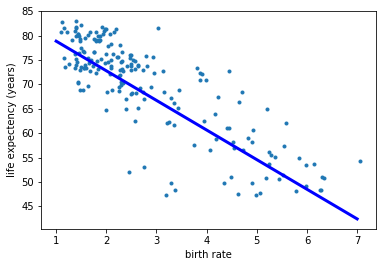

In [9]:
X_test = np.arange(1,8)
Y_pred = m_out*X_test + b_out
plt.scatter(data[:,0], data[:,1],marker='.')
plt.plot(X_test,Y_pred,color='blue',linewidth=3)
plt.xlabel('birth rate')
_ = plt.ylabel('life expectency (years)')

one could fit different models quite easily, for example, a quadratic model

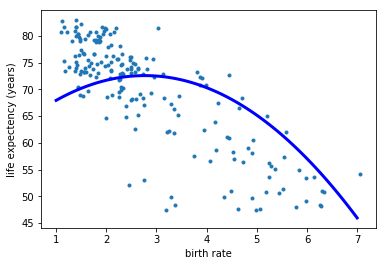

In [10]:
# build data flow graph.
tf.reset_default_graph()

# create placeholders for X (birth rate) and Y (life expectancy)
# a.k.a. define variable without initializing them.
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


# create slope and intercep, initialized to 0
a = tf.get_variable('quadratic_coeff', initializer=tf.constant(0.0))
b = tf.get_variable('linear_coeff', initializer=tf.constant(0.0))
c = tf.get_variable('constant_coeff', initializer=tf.constant(0.0))

# construct model to predict Y (life expectancy from birth rate)
Y_predicted = a * X * X + b * X + c 

# use squared error as the function to minimize
loss = tf.square(Y - Y_predicted)

# using gradient descent with learning rate of 0.01 to minimize loss
# in neural networks: learning rate controls how much we are adjusting weight of network
# with respect to gradient loss.  (a.k.a. maximum step size)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
 
with tf.Session() as sess:
    # initialize the necessary variables, in this case, m and b
    sess.run(tf.global_variables_initializer()) 
    
    # train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y:y}) 

    # output the values of m and b
    a_out, b_out, c_out = sess.run([a, b , c]) 
    
X_test = np.linspace(1,7,100)
Y_pred = a_out*X_test**2 + b_out * X_test + c_out
plt.scatter(data[:,0], data[:,1],marker='.')
plt.plot(X_test,Y_pred,color='blue',linewidth=3)
plt.xlabel('birth rate')
_ = plt.ylabel('life expectency (years)')    

clearly, not a great fit, but it was easy to specify a model.  

If you've used TensorFlow before, you're probably rolling your eyes because this simplistic example stores data in a non-TensorFlow object, namely, a NumPy array, and then feed it into TensorFlow using feed_dict.  One should instead use tf.data, where specifically, we store it in a tf.data.Dataset object.  Lets do some benchmarks. Back to linear regression.

In [11]:
import os
import time

In [12]:
# build data flow graph.
tf.reset_default_graph()

# create placeholders for X (birth rate) and Y (life expectancy)
# a.k.a. define variable without initializing them.
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


# create slope and intercep, initialized to 0
m = tf.get_variable('slope', initializer=tf.constant(0.0))
b = tf.get_variable('intercept', initializer=tf.constant(0.0))

# construct model to predict Y (life expectancy from birth rate)
Y_predicted = m * X + b 

# use squared error as the function to minimize
loss = tf.square(Y - Y_predicted)

# using gradient descent with learning rate of 0.01 to minimize loss
# in neural networks: learning rate controls how much we are adjusting weight of network
# with respect to gradient loss.  (a.k.a. maximum step size)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
 
start = time.time()    
with tf.Session() as sess:
    # initialize the necessary variables, in this case, m and b
    sess.run(tf.global_variables_initializer()) 
    
    # train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y:y}) 

    # output the values of m and b
    m_out, b_out = sess.run([m, b]) 
    
print('Computation took: %f seconds' %(time.time() - start))    

Computation took: 5.680037 seconds


lets now export the data to the tf.data object

In [13]:
# build data flow graph.
tf.reset_default_graph()

dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

# create slope and intercep, initialized to 0
m = tf.get_variable('slope', initializer=tf.constant(0.0))
b = tf.get_variable('intercept', initializer=tf.constant(0.0))

# construct model to predict Y (life expectancy from birth rate)
Y_predicted = m * X + b 

# use squared error as the function to minimize
loss = tf.square(Y - Y_predicted)

# using gradient descent with learning rate of 0.01 to minimize loss
# in neural networks: learning rate controls how much we are adjusting weight of network
# with respect to gradient loss.  (a.k.a. maximum step size)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
 
start = time.time()    

with tf.Session() as sess:
    # initialize the necessary variables, in this case, m and b
    sess.run(tf.global_variables_initializer()) 
    
    # train the model
    for i in range(100): # run 100 epochs
        sess.run(iterator.initializer) # initialize the iterator
   
    # output the values of m and b
    m_out, b_out = sess.run([m, b])
    
print('Computation took: %f seconds' %(time.time() - start))     

Computation took: 0.025173 seconds


# Keras

Now that we have a taste for TensorFlow, lets explore Keras.  What is Keras?  An progamming interface that gives access to various machine learning libraries: TensorFlow / Theano / CNTK (Microsoft Cognitive Toolkit).  Idea: the low-level machine-learning libraries provide access to machine learning algorithms executed on various architectures (e.g. GPU/CPU/TPU (tensor processing unit).  Want one code to be able to access different machine learning libraries to give more confidence for results obtained, benchmark comparisons, leverage best of each library.  

There are actually several APIs available, but Keras is the official high-level API of TensorFlow: all the tutorials use Keras to lower the barrier of entry for researchers.
- part of core TensorFlow since version 1.4
- tensorflow.keras (tf.keras) module
- optimized for TF, and better integration with TF-specific features.
- contributors to Keras: google, NVIDIA, AWS, Microsoft


## Keras API styles

There are three styles to building, training and deploying models with Keras.
- sequential model, https://keras.io/models/sequential/.  As the name suggests, this allows single input, single output layer stacks.  It is dead simple, but a reasonable mode for many cases.
- functional API: multi-input, multi-output graph topologies.  Kinda like playing with LEGO bricks.  Good for most cases
- Model subclassing: most flexibility.

Let's walk through the sequential model approach to solving the above expectancy/birth rate regression model using Keras.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

# normalize the data
mean = data.mean(axis=0)
std = data.std(axis=0)

norm_data = (data - mean)/std

Now, we use the sequential model a densely connected layer, and an output layer that returns a single continuous variable.  The model needs to know what input shape it should expect. This is only needed for the first layer, because the following layers can do automatic shape inference.

In [15]:
model = keras.Sequential()
model.add(layers.Dense(1,input_dim=1))
model.add(layers.Activation('relu')) # relu: rectified linear unit, max(x,0) by default

Activation functions are a key component of neural networks, in that they introduce non-linear properties to the network.  The main purpose of an activation function is to convert an incoming signal, and transform it (in a non-linear fashion) to an output signal.  There are many different built in activation functions: https://keras.io/activations/.  Some of the more popular include:
- relu: rectified linear units.  by default, $f(x)$ returns $\max{(x,0)}$.  More generally, it supports:

\begin{align}
f(x) = 
\begin{cases}
\text{max value} & x \ge \text{max value} \\
x & \text{threshold} \le x \le \text{max value} \\
\alpha(x-\text{threshold}) & \text{otherwise}
\end{cases}
\end{align}

- sigmoid (logistic) 
\begin{align}
f(x) = \frac{e^x}{e^x + 1}
\end{align}

- hyperbolic tangent
\begin{align}
f(x) = \tanh(x)
\end{align}

Lets see a summary of the model

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We now need to configure the modle for training.  This is accomplished by calling the compile function.  https://keras.io/models/sequential/.  We need to specify the optimizer, the loss function and an approriate list of metrics.

In [17]:
model.compile(optimizer='rmsprop', # scaled gradient descent
              loss='mse', # mean squared error
              metrics=['mae']) # mean absolute error

Then, we can train the model.

In [18]:
model.fit(norm_data[:,0], norm_data[:,1],
          epochs=10,
          validation_split=0.2)

Train on 152 samples, validate on 38 samples
Epoch 1/10
152/152 [==============================] - 0s 909us/step - loss: 0.4853 - mean_absolute_error: 0.5538 - val_loss: 2.4655 - val_mean_absolute_error: 1.4430
Epoch 2/10
152/152 [==============================] - 0s 46us/step - loss: 0.4763 - mean_absolute_error: 0.5465 - val_loss: 2.4666 - val_mean_absolute_error: 1.4427
Epoch 3/10
152/152 [==============================] - 0s 45us/step - loss: 0.4699 - mean_absolute_error: 0.5413 - val_loss: 2.4675 - val_mean_absolute_error: 1.4424
Epoch 4/10
152/152 [==============================] - 0s 56us/step - loss: 0.4643 - mean_absolute_error: 0.5366 - val_loss: 2.4684 - val_mean_absolute_error: 1.4421
Epoch 5/10
152/152 [==============================] - 0s 45us/step - loss: 0.4590 - mean_absolute_error: 0.5322 - val_loss: 2.4693 - val_mean_absolute_error: 1.4418
Epoch 6/10
152/152 [==============================] - 0s 56us/step - loss: 0.4540 - mean_absolute_error: 0.5278 - val_loss: 2.470

lets see how the fit went.  Normally, we would split the data into a training set and a test set, but I didn't do that here so we can compare to the regression fit above.

In [27]:
regress_x = np.linspace(1,7,100)
regress_x = (regress_x - mean[0])/std[0]
regress_y = model.predict(regress_x)

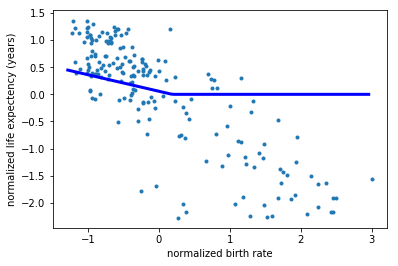

In [28]:
import matplotlib.pyplot as plt

plt.scatter(norm_data[:,0], norm_data[:,1],marker='.')
plt.plot(regress_x,regress_y,color='blue',linewidth=3)
plt.xlabel('normalized birth rate')
_ = plt.ylabel('normalized life expectency (years)')

Hmm, there's something I'm mis-understanding about the fitting (or maybe the prediction?) ... looks non-linear.  

Lets repeat again, but without the activation function.

Train on 152 samples, validate on 38 samples
Epoch 1/10
152/152 [==============================] - 0s 1ms/step - loss: 0.3225 - mean_absolute_error: 0.4388 - val_loss: 0.6055 - val_mean_absolute_error: 0.5842
Epoch 2/10
152/152 [==============================] - 0s 46us/step - loss: 0.3192 - mean_absolute_error: 0.4366 - val_loss: 0.6007 - val_mean_absolute_error: 0.5797
Epoch 3/10
152/152 [==============================] - 0s 51us/step - loss: 0.3169 - mean_absolute_error: 0.4352 - val_loss: 0.5973 - val_mean_absolute_error: 0.5764
Epoch 4/10
152/152 [==============================] - 0s 43us/step - loss: 0.3152 - mean_absolute_error: 0.4341 - val_loss: 0.5937 - val_mean_absolute_error: 0.5728
Epoch 5/10
152/152 [==============================] - 0s 47us/step - loss: 0.3132 - mean_absolute_error: 0.4326 - val_loss: 0.5902 - val_mean_absolute_error: 0.5694
Epoch 6/10
152/152 [==============================] - 0s 53us/step - loss: 0.3114 - mean_absolute_error: 0.4317 - val_loss: 0.5870 

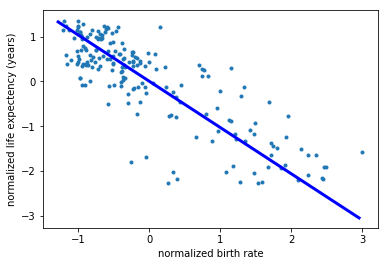

In [30]:
model = keras.Sequential()
model.add(layers.Dense(1,input_dim=1))

model.compile(optimizer='rmsprop', # scaled gradient descent
              loss='mse', # mean squared error
              metrics=['mae']) # mean absolute error

model.fit(norm_data[:,0], norm_data[:,1],
          epochs=10,
          validation_split=0.2)

regress_x = np.linspace(1,7,100)
regress_x = (regress_x - mean[0])/std[0]
regress_y = model.predict(regress_x)

plt.scatter(norm_data[:,0], norm_data[:,1],marker='.')
plt.plot(regress_x,regress_y,color='blue',linewidth=3)
plt.xlabel('normalized birth rate')
_ = plt.ylabel('normalized life expectency (years)')

hmm, certainly appears to be the non-linear activation function that gave the earlier non-linear behavior.  Probably with a larger data set where TensorFlow can do a better job with cross validation, this behavior is seldom noticed.